In [ ]:
import graphviz

In [ ]:
data = {
  "entities": [
    {
      "name": "Program",
      "attributes": {
        "description": "Software system for tomographic image analysis",
        "functionality": "Analyzing tomographic images for defect detection",
        "components": ["Neural Network", "Intelligent Interface"]
      }
    },
    {
      "name": "Analysis",
      "attributes": {
        "purpose": "Defect detection in materials",
        "methods": ["Neural Network"]
      }
    },
    {
      "name": "DefectDetection",
      "attributes": {
        "target": "Polymeric materials",
        "techniques": ["Tomographic image analysis"]
      }
    },
    {
      "name": "PolymericMaterials",
      "attributes": {
        "properties": ["Unique characteristics", "Usage in various industries"]
      }
    },
    {
      "name": "NeuralNetwork",
      "attributes": {
        "type": "Artificial neural network",
        "architecture": "Deep learning model",
        "training_data": "Tomographic image datasets"
      }
    },
    {
      "name": "IntelligentInterface",
      "attributes": {
        "functionality": "User-friendly interface for interacting with the system",
        "features": ["Visualization of analysis results", "Interactive controls"]
      }
    }
  ],
  "associations": [
    {"from": "Program", "to": "Analysis", "type": "Utilizes"},
    {"from": "Analysis", "to": "DefectDetection", "type": "FocusesOn"},
    {"from": "DefectDetection", "to": "PolymericMaterials", "type": "Targets"},
    {"from": "Program", "to": "NeuralNetwork", "type": "Deploys"},
    {"from": "Program", "to": "IntelligentInterface", "type": "Incorporates"}
  ],
  "rules": [
    {
      "name": "Rule 1 High Confidence Defects",
      "condition": "Analysis confidenceLevel more then 0.8",
      "action": "Flag the image for further review",
      "subject": ['DefectDetection', 'Analysis']
    },
    {
      "name": "Rule 2 Material Specific Analysis",
      "condition": "DefectDetection target is Polymeric materials",
      "action": "Apply specific algorithms for polymeric materials",
      "subject": ['PolymericMaterials', 'Analysis']
    }
  ]
}

In [ ]:
entities = data['entities']
associations = data['associations']
rules = data.get('rules', [])


dot = graphviz.Digraph()

for entity in entities:
    attributes = entity.get('attributes', {})

    attributes_str = "<BR/>".join([f"<B>{key}:</B> {value}" for key, value in attributes.items()])
    label = f'<<TABLE BORDER="1" CELLBORDER="1" CELLPADDING="4"><TR><TD>{entity["name"]}</TD></TR><TR><TD PORT="attributes">{attributes_str}</TD></TR></TABLE>>'
    dot.node(entity["name"], label, shape="none")

for association in associations:
    dot.edge(association["from"], association["to"], label=association["type"])

for rule in rules:
    for subj in rule['subject']:
      rule_str = f'{rule["name"]}\n IF {rule["condition"]}\n THEN {rule["action"]}'
      dot.edge(rule_str, subj, label="affects")

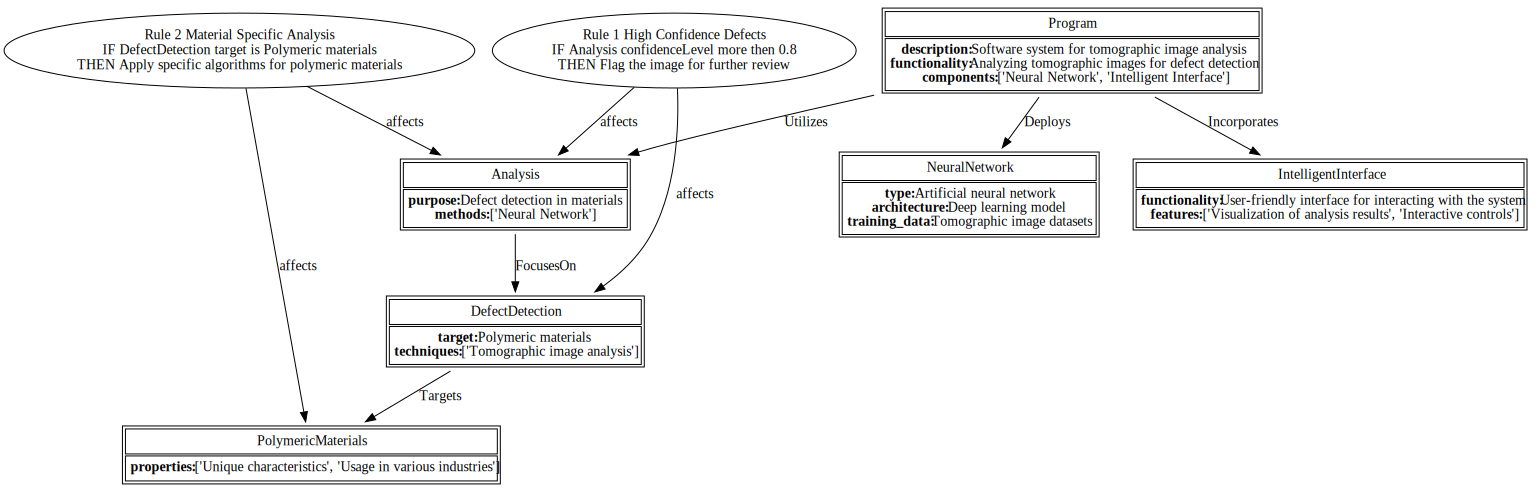

In [ ]:
dot